<a href="https://colab.research.google.com/github/sridevibonthu/EVA/blob/master/S13/EVA4_S13_Task1_OPENCV_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [0]:
#link to weights
#https://drive.google.com/drive/folders/1LezFG5g3BCW6iYaV89B2i64cqEUZD7e0
#used this and saved weights to my drive


In [0]:
!pip install opencv-python==4.2.0.34

     |████████████████████████████████| 28.2MB 108kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [0]:
import cv2
import numpy as np

**Cloning the github repository of jason reddie(developer of yolo) for getting configuration file and coco.names folder**

In [0]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5904 (delta 0), reused 1 (delta 0), pack-reused 5901
Receiving objects: 100% (5904/5904), 6.17 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (3921/3921), done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Go through the link to weights and you will fing yolov3.weights file and move it to your drive**

In [0]:
# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/My Drive/yolov3.weights", "/content/darknet/cfg/yolov3.cfg")
classes = []
with open("/content/darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
# Loading image
img = cv2.imread("/content/gdrive/My Drive/EVA4/images/with car.jpeg")
img = cv2.resize(img, (609,609), fx=0.4, fy=0.4)
height, width, channels = img.shape

In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [0]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

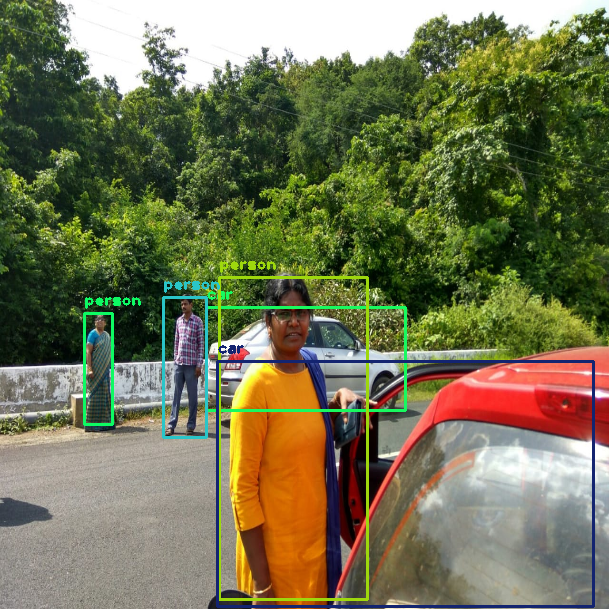

In [0]:
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 8), font, 1, color, 2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()